<a href="https://colab.research.google.com/github/amFarrouk/OCR_prj/blob/main/simpleCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import zipfile

In [2]:
!wget https://raw.githubusercontent.com/amFarrouk/OCR_prj/main/bdh.zip
!unzip -qq ./bdh.zip 
!rm ./bdh.zip

--2021-12-21 20:37:38--  https://raw.githubusercontent.com/amFarrouk/OCR_prj/main/bdh.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7536168 (7.2M) [application/zip]
Saving to: ‘bdh.zip’

bdh.zip             100%[===================>]   7.19M  --.-KB/s    in 0.09s   

2021-12-21 20:37:38 (79.9 MB/s) - ‘bdh.zip’ saved [7536168/7536168]



In [3]:
!wget https://www.dropbox.com/s/qpagi0h1089kr2f/images_df.csv

--2021-12-21 20:37:41--  https://www.dropbox.com/s/qpagi0h1089kr2f/images_df.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/qpagi0h1089kr2f/images_df.csv [following]
--2021-12-21 20:37:41--  https://www.dropbox.com/s/raw/qpagi0h1089kr2f/images_df.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7c996318e85ac2f9a62d46bbd5.dl.dropboxusercontent.com/cd/0/inline/BcTV3FXZgz8XVTV7cPD1qdbt01jH3b1wQG-XWyFsR5ABWZ6oSB-sImp4bk3d112oz4tdGvE5iYdp_Q-E3KKDQsq4FD_K1FujaZMAYm75wJSA_H9h3sR1qUC2wQqQyIJVOjnPsHMglvdJvMLUfl9wFkIb/file# [following]
--2021-12-21 20:37:41--  https://uc7c996318e85ac2f9a62d46bbd5.dl.dropboxusercontent.com/cd/0/inline/BcTV3FXZgz8XVTV7cPD1qdbt01jH3b1wQG-XWyFsR5ABWZ6oSB-sImp4bk3d112oz4tdGvE5iYdp_Q-E3KKDQsq

In [4]:
images_df=pd.read_csv("./images_df.csv",header=None,names=["img","label"])
images_df["label"]=images_df["label"].apply(lambda x : str(x))
images_df.head()

,img,label
0,ae07_005.bmp,18
1,ae07_011.bmp,17
2,ae07_014.bmp,20
3,ae07_015.bmp,18
4,ae07_022.bmp,12


In [5]:
labels=images_df['label']
labels=labels.to_numpy()

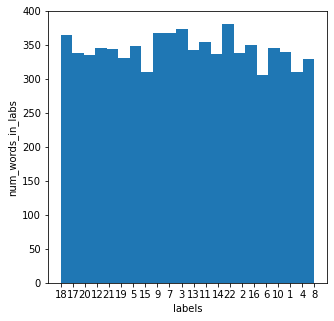

In [6]:
plt.figure(figsize=(5,5))
plt.xlim()
plt.xlabel("labels")
plt.ylabel("num_words_in_labs")
plt.hist(labels,bins=22)
plt.show()

In [7]:
img1=cv2.imread("./bdh/ae07_005.bmp",cv2.IMREAD_GRAYSCALE)
img2=cv2.imread("./bdh/ae07_031.bmp",cv2.IMREAD_GRAYSCALE)
img3=cv2.imread("./bdh/ae09_017.bmp",cv2.IMREAD_GRAYSCALE)
img4=cv2.imread("./bdh/ai64_020.bmp",cv2.IMREAD_GRAYSCALE)

Text(0.5, 0, 'ai64_020.bmp')

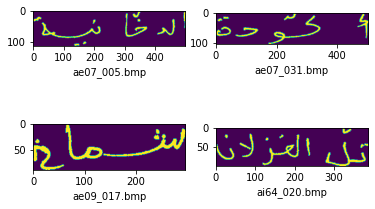

In [8]:
_, axarr = plt.subplots(2,2)

axarr[0,0].imshow(img1)
axarr[0,0].set_xlabel("ae07_005.bmp")
axarr[0,1].imshow(img2)
axarr[0,1].set_xlabel("ae07_031.bmp")
axarr[1,0].imshow(img3)
axarr[1,0].set_xlabel("ae09_017.bmp")
axarr[1,1].imshow(img4)
axarr[1,1].set_xlabel("ai64_020.bmp")

In [9]:
imgresize1 = cv2.resize(img1, (760, 120)) 
imgresize2 = cv2.resize(img2, (760, 120)) 
imgresize3 = cv2.resize(img3, (760, 120)) 
imgresize4 = cv2.resize(img4, (760, 120)) 

Text(0.5, 0, 'ai64_020.bmp')

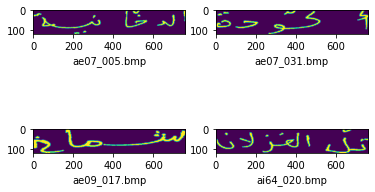

In [10]:
_, axarr = plt.subplots(2,2)
axarr[0,0].imshow(imgresize1)
axarr[0,0].set_xlabel("ae07_005.bmp")
axarr[0,1].imshow(imgresize2)
axarr[0,1].set_xlabel("ae07_031.bmp")
axarr[1,0].imshow(imgresize3)
axarr[1,0].set_xlabel("ae09_017.bmp")
axarr[1,1].imshow(imgresize4)
axarr[1,1].set_xlabel("ai64_020.bmp")

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
all_x,all_y=images_df["img"],images_df["label"]

xtrain,xtest,ytrain,ytest=train_test_split(all_x,all_y,train_size=0.8,random_state=1,shuffle=True)

train_df=pd.DataFrame(xtrain,columns=["img"])
train_df["label"]=ytrain

print("train_data:")
train_df.head()

train_data:


,img,label
5764,de12_032.bmp,16
7223,dm34_024.bmp,16
5124,cj14_066.bmp,13
5621,cq65_006.bmp,8
2624,bi06_006.bmp,16


In [13]:
test_df=pd.DataFrame(xtest,columns=["img"])
test_df["label"]=ytest

print("test_data:")
test_df.head()

test_data:


,img,label
3069,bj01_033.bmp,3
642,af62_017.bmp,22
7266,dq06_018.bmp,8
5765,de12_034.bmp,16
2229,be92_023.bmp,13


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
train_image_gen=ImageDataGenerator(rescale=1.0/255)
test_image_gen=ImageDataGenerator(rescale=1.0/255)

In [16]:
train_image_gen=train_image_gen.flow_from_dataframe(train_df,x_col="img",y_col="label",
                                            directory="./bdh",
                                            batch_size=32,
                                            target_size=(imgresize1.shape[0],imgresize1.shape[1]),
                                            color_mode='grayscale',
                                            class_mode='categorical')

Found 6048 validated image filenames belonging to 22 classes.


In [17]:
test_image_gen=test_image_gen.flow_from_dataframe(test_df,x_col="img",y_col="label",
                                            directory="./bdh",
                                            batch_size=32,
                                            target_size=(imgresize1.shape[0],imgresize1.shape[1]),
                                            color_mode='grayscale',
                                            class_mode='categorical')

Found 1512 validated image filenames belonging to 22 classes.


In [18]:
import tensorflow as tf

In [38]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 760x120 with 1 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (6,6), activation='relu', input_shape=(760, 120, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The third convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
     # The fifth convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 128 neuron hidden layer
    tf.keras.layers.Dense(128, activation='relu'),
    # Only 22 output neuron.
    tf.keras.layers.Dense(22, activation='softmax')
])

In [39]:
loss=tf.keras.losses.categorical_crossentropy
optim=tf.keras.optimizers.Adam()
myCallBack=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3)

model.compile(optimizer=optim, loss=loss, metrics=['accuracy'])

In [40]:
_=tf.keras.utils.plot_model(
    model, to_file='./simpleCNN1.png', show_shapes=True, show_layer_names=False,
)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 755, 115, 64)      2368      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 377, 57, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 375, 55, 32)       18464     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 187, 27, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 185, 25, 32)       9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 92, 12, 32)      

In [41]:
history=model.fit(train_image_gen,epochs=10,steps_per_epoch=189,validation_data=test_image_gen)#,callbacks=[myCallBack])

Epoch 1/10
189/189 [==============================] - 50s 262ms/step - loss: 0.6249 - accuracy: 0.8143 - val_loss: 0.1872 - val_accuracy: 0.9444
Epoch 2/10
189/189 [==============================] - 49s 261ms/step - loss: 0.0945 - accuracy: 0.9729 - val_loss: 0.1531 - val_accuracy: 0.9517
Epoch 3/10
189/189 [==============================] - 49s 260ms/step - loss: 0.0330 - accuracy: 0.9897 - val_loss: 0.1541 - val_accuracy: 0.9583
Epoch 4/10
189/189 [==============================] - 49s 260ms/step - loss: 0.0163 - accuracy: 0.9944 - val_loss: 0.1694 - val_accuracy: 0.9537
Epoch 5/10
189/189 [==============================] - 49s 260ms/step - loss: 0.0303 - accuracy: 0.9896 - val_loss: 0.1630 - val_accuracy: 0.9577
Epoch 6/10
189/189 [==============================] - 49s 260ms/step - loss: 0.0175 - accuracy: 0.9947 - val_loss: 0.1900 - val_accuracy: 0.9491
Epoch 7/10
189/189 [==============================] - 49s 261ms/step - loss: 0.0085 - accuracy: 0.9970 - val_loss: 0.2592 - val_ac

In [42]:
#-----------------------------------------------------------------------
# Retrieve a list of list results on training and test data of 1st model
# sets for each training epoch
#-----------------------------------------------------------------------
acc_hist=history.history['accuracy']
val_acc_hist=history.history['val_accuracy']
loss_hist=history.history['loss']
val_loss_hist=history.history['val_loss']

epochs=range(len(acc_hist)) # Get number of epochs

In [ ]:
model2 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(760, 120, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # Only 22 output neuron.
    tf.keras.layers.Dense(22, activation='softmax')
])

In [ ]:
loss=tf.keras.losses.categorical_crossentropy
optim=tf.keras.optimizers.Adam()
myCallBack=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3)

model2.compile(optimizer=optim, loss=loss, metrics=['accuracy'])

In [ ]:
history2=model2.fit(train_image_gen,epochs=100,steps_per_epoch=189,validation_data=test_image_gen,callbacks=[myCallBack])

Epoch 1/100
189/189 [==============================] - 69s 342ms/step - loss: 0.5739 - accuracy: 0.8307 - val_loss: 0.1517 - val_accuracy: 0.9537
Epoch 2/100
189/189 [==============================] - 64s 336ms/step - loss: 0.0691 - accuracy: 0.9773 - val_loss: 0.1268 - val_accuracy: 0.9623
Epoch 3/100
189/189 [==============================] - 64s 337ms/step - loss: 0.0214 - accuracy: 0.9937 - val_loss: 0.2776 - val_accuracy: 0.9411
Epoch 4/100
189/189 [==============================] - 64s 336ms/step - loss: 0.0394 - accuracy: 0.9868 - val_loss: 0.1175 - val_accuracy: 0.9630
Epoch 5/100
189/189 [==============================] - 63s 335ms/step - loss: 0.0089 - accuracy: 0.9970 - val_loss: 0.1687 - val_accuracy: 0.9557
Epoch 6/100
189/189 [==============================] - 63s 335ms/step - loss: 0.0219 - accuracy: 0.9950 - val_loss: 0.1301 - val_accuracy: 0.9669
Epoch 7/100
189/189 [==============================] - 63s 335ms/step - loss: 0.0332 - accuracy: 0.9909 - val_loss: 0.1302 -

In [ ]:
#-----------------------------------------------------------------------
# Retrieve a list of list results on training and test data of 2nd model
# sets for each training epoch
#-----------------------------------------------------------------------
acc2_hist=history2.history['accuracy']
val_acc2_hist=history2.history['val_accuracy']
loss2_hist=history2.history['loss']
val_loss2_hist=history2.history['val_loss']

epochs2=range(len(acc2_hist)) # Get number of epochs

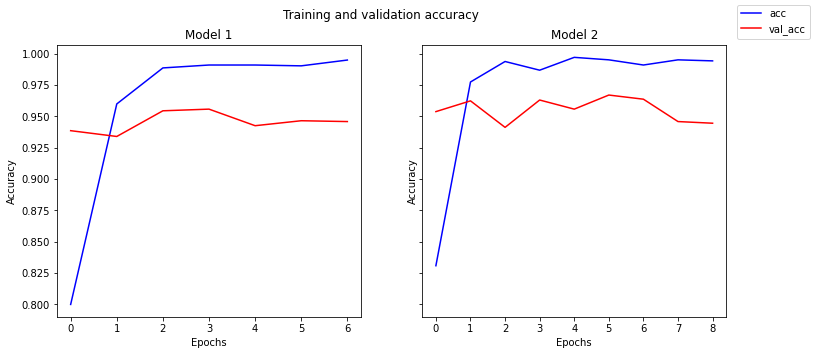

In [ ]:
#----------------------------------------------------------------
# Plot training and validation accuracy per epoch for both models
#----------------------------------------------------------------
fig, (axs1, axs2) = plt.subplots(1, 2,figsize=(12,5),sharey=True)
fig.suptitle('Training and validation accuracy')

axs1.set_title('Model 1')
axs1.set(xlabel="Epochs",ylabel="Accuracy")
axs1.plot(epochs, acc_hist,'b',label="acc")
axs1.plot(epochs, val_acc_hist,'r',label="val_acc")

axs2.set_title('Model 2')
axs2.set(xlabel="Epochs",ylabel="Accuracy")
axs2.plot(epochs2, acc2_hist,'b')
axs2.plot(epochs2, val_acc2_hist,'r')

fig.legend(loc="upper right")
plt.show()

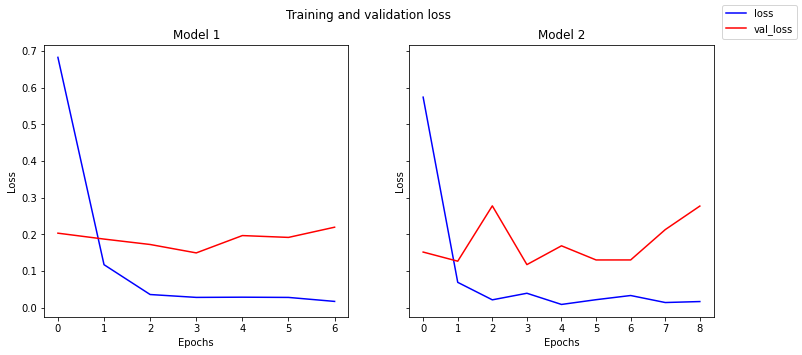

In [ ]:
#----------------------------------------------------------------
# Plot training and validation accuracy per epoch for both models
#----------------------------------------------------------------
fig, (axs1, axs2) = plt.subplots(1, 2,figsize=(12,5),sharey=True)
fig.suptitle('Training and validation loss')

axs1.set_title('Model 1')
axs1.set(xlabel="Epochs",ylabel="Loss")
axs1.plot(epochs, loss_hist,'b',label="loss")
axs1.plot(epochs, val_loss_hist,'r',label="val_loss")

axs2.set_title('Model 2')
axs2.set(xlabel="Epochs",ylabel="Loss")
axs2.plot(epochs2, loss2_hist,'b')
axs2.plot(epochs2, val_loss2_hist,'r')

fig.legend(loc="upper right")
plt.show()

### Partie 2
#### Data Augementation
Exploring different effects of data augmentation on performance of Models<br>

<ul>
<li>Zoom</li>
</ul>

<ul>
<li>Rotation</li>
</ul>

<ul>
<li>Width shift range</li>
</ul>

<ul>
<li>Height shift range</li>
</ul>

<ul>
<li>Combination of 4 methods</li>
</ul>

In [43]:
datagen = ImageDataGenerator(width_shift_range=[-50,100],
                            height_shift_range=[0.1,0.3],
                            rotation_range=30,rescale=1.0/255,
                            zoom_range=[0.9,1.0])
                            #horizontal_flip=True)??

In [44]:
train_image_gen_aug=datagen.flow_from_dataframe(train_df,x_col="img",y_col="label",
                                            directory="./bdh",
                                            batch_size=32,
                                            target_size=(imgresize1.shape[0],imgresize1.shape[1]),
                                            color_mode='grayscale',
                                            class_mode='categorical')

Found 6048 validated image filenames belonging to 22 classes.


In [45]:
model_aug = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 760x120 with 1 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (6,6), activation='relu', input_shape=(760, 120, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The third convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
     # The fifth convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 128 neuron hidden layer
    tf.keras.layers.Dense(128, activation='relu'),
    # Only 22 output neuron.
    tf.keras.layers.Dense(22, activation='softmax')
])

In [46]:
loss=tf.keras.losses.categorical_crossentropy
optim=tf.keras.optimizers.Adam()
myCallBack=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3)

model_aug.compile(optimizer=optim, loss=loss, metrics=['accuracy'])

In [47]:
history_aug=model_aug.fit(train_image_gen_aug,epochs=100,steps_per_epoch=189,
                          validation_data=test_image_gen,callbacks=[myCallBack])

Epoch 1/100
189/189 [==============================] - 67s 353ms/step - loss: 2.8237 - accuracy: 0.1152 - val_loss: 2.4471 - val_accuracy: 0.2017
Epoch 2/100
189/189 [==============================] - 66s 346ms/step - loss: 2.2061 - accuracy: 0.2712 - val_loss: 1.7569 - val_accuracy: 0.3776
Epoch 3/100
189/189 [==============================] - 66s 349ms/step - loss: 1.9076 - accuracy: 0.3733 - val_loss: 1.4779 - val_accuracy: 0.4709
Epoch 4/100
189/189 [==============================] - 64s 340ms/step - loss: 1.6993 - accuracy: 0.4410 - val_loss: 1.4654 - val_accuracy: 0.4835
Epoch 5/100
189/189 [==============================] - 65s 341ms/step - loss: 1.5584 - accuracy: 0.4879 - val_loss: 1.0650 - val_accuracy: 0.6329
Epoch 6/100
189/189 [==============================] - 64s 340ms/step - loss: 1.4289 - accuracy: 0.5308 - val_loss: 1.0926 - val_accuracy: 0.6019
Epoch 7/100
189/189 [==============================] - 64s 339ms/step - loss: 1.3014 - accuracy: 0.5718 - val_loss: 0.8599 -

KeyboardInterrupt: ignored

In [34]:
#-----------------------------------------------------------------------
# Retrieve a list of list results on training and test data of 3rd model
# sets for each training epoch
#-----------------------------------------------------------------------
acc1_aug_hist=history_aug.history['accuracy']
val_acc1_aug_hist=history_aug.history['val_accuracy']
loss1_aug_hist=history_aug.history['loss']
val_loss1_aug_hist=history_aug.history['val_loss']

epochs1_aug=range(len(acc1_aug_hist)) # Get number of epochs

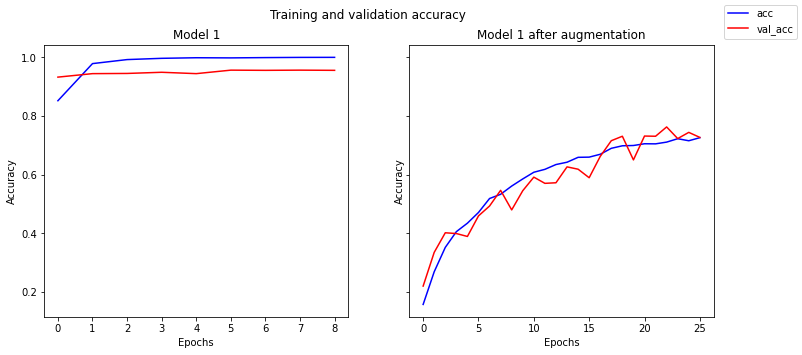

In [35]:
#----------------------------------------------------------------
# Plot training and validation accuracy per epoch for both models
#----------------------------------------------------------------
fig, (axs1, axs2) = plt.subplots(1, 2,figsize=(12,5),sharey=True)
fig.suptitle('Training and validation accuracy')

axs1.set_title('Model 1')
axs1.set(xlabel="Epochs",ylabel="Accuracy")
axs1.plot(epochs, acc_hist,'b',label="acc")
axs1.plot(epochs, val_acc_hist,'r',label="val_acc")

axs2.set_title('Model 1 after augmentation')
axs2.set(xlabel="Epochs",ylabel="Accuracy")
axs2.plot(epochs1_aug, acc1_aug_hist,'b')
axs2.plot(epochs1_aug, val_acc1_aug_hist,'r')

fig.legend(loc="upper right")
plt.show()

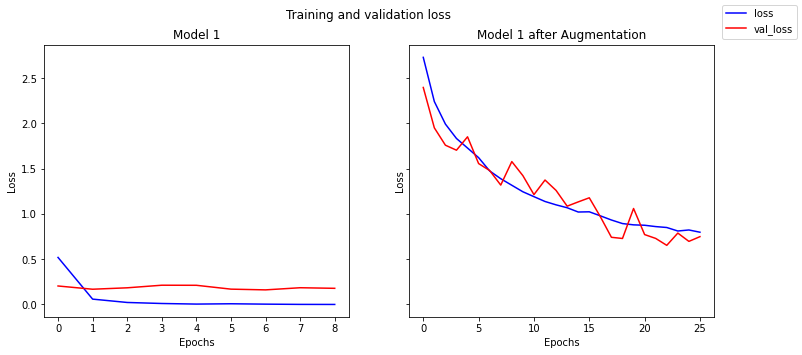

In [36]:
#----------------------------------------------------------------
# Plot training and validation accuracy per epoch for both models
#----------------------------------------------------------------
fig, (axs1, axs2) = plt.subplots(1, 2,figsize=(12,5),sharey=True)
fig.suptitle('Training and validation loss')

axs1.set_title('Model 1')
axs1.set(xlabel="Epochs",ylabel="Loss")
axs1.plot(epochs, loss_hist,'b',label="loss")
axs1.plot(epochs, val_loss_hist,'r',label="val_loss")

axs2.set_title('Model 1 after Augmentation')
axs2.set(xlabel="Epochs",ylabel="Loss")
axs2.plot(epochs1_aug, loss1_aug_hist,'b')
axs2.plot(epochs1_aug, val_loss1_aug_hist,'r')

fig.legend(loc="upper right")
plt.show()